# 01. Map polynya events with University Bremen ASI Sea Ice Concentrations

Data source:
https://seaice.uni-bremen.de/sea-ice-concentration/amsre-amsr2/

**This version of the map is edited by Noel Wang, based on the original code by Mackenzie Jewell**

This version is in the fork.

Note: the date ranges of this file are from 

June 6 2002 to 7 29 2002
8-08-2002- Oct 4 2011
July 7 2012 to june 13 2024

## Import packages

In [2]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.widgets import Button, Slider #import packages for the slider
import matplotlib.animation as animation #imported for animation
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

## Make map

In [ ]:
# list = []
# daterange = pd.date_range(datetime(2024, 1, 1), datetime(2024, 1, 5))
# for date in daterange:
#     if date > datetime(2024, 1, 2) and date < datetime(2024, 1, 4):
#         continue
#     else:
#         print(date)

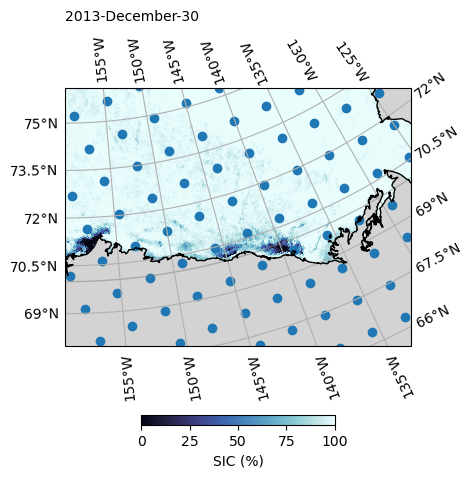

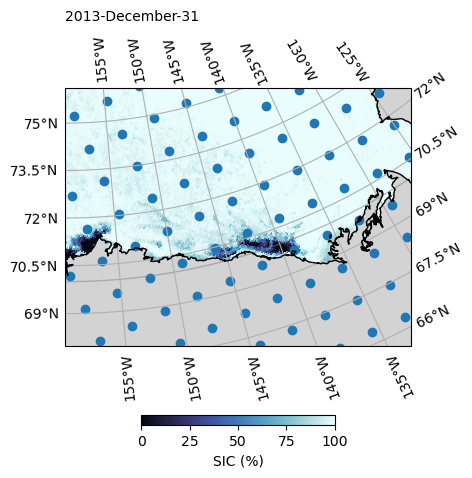

In [21]:
#making the date list
#============================
date_list = pd.date_range(datetime(2013, 12, 30), datetime(2013, 12, 31)) #make this a date list

#============================

maps_list = []

for date in date_list:
    if date > datetime(2011, 10, 4) and date < datetime(2012, 7, 2):
        continue

    else:
        # read daily sic data from computer files into dictionary
        data = grab_ASI_SIC(date=date.to_pydatetime(), 
                        main_path='/Volumes/Seagate2/asi-AMSR-SIC/n6250/', 
                        coord_file='LongitudeLatitudeGrid-n6250-Arctic.hdf', 
                        hemisphere='n', resolution='6250', version='v5.4', 
                        return_vars=['xx', 'yy', 'lon', 'lat', 'sic', 'proj', 'ds'], 
                        include_units=False, annual_folders=False, return_dict = True, quiet=True)


        # create figure
        #--------------
        # create map figure in north polar stereographic projection
        map_projection = ccrs.NorthPolarStereo(central_longitude=200) #rotation of the map
        fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(projection=map_projection))

        # background color
        ax.patch.set_facecolor('lightgray')

        # set map extent [lon1, lon2, lat1, lat2]
        ax.set_extent([200, 230, 68, 74], crs=ccrs.PlateCarree())  

        # add coastlines
        ax.coastlines(zorder=100)

        # lat / lon lines
        add_grid(ax, lats=np.arange(60,90,10), lons=np.arange(0,360,90), linewidth=1, color='gray', alpha=0.5, zorder=4)
        ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)


        # plot 2d sic data 
        icec = ax.pcolormesh(data['xx'], data['yy'], data['sic'], 
                            cmap = cmocean.cm.ice, vmin=0, vmax=100, transform=data['proj'])
        
        sp =20
        ax.scatter(data['xx'][::sp, ::sp], data['yy'][::sp, ::sp], transform=data['proj'])

        #add colorbar
        plt.colorbar(icec, label='SIC (%)', orientation='horizontal', shrink = 0.5, pad=0.18)

        # #make a vertical slider for the date
        # fig.subplots_adjust(left=0.25) #move the plot over to make room for the slider
        # axdate = fig.add_axes([0.1, 0.25, 0.0225, 0.63]) #make a box to put the slider in
        # time_slider = Slider(
        #     ax=axdate,
        #     label="Date",
        #     valmin=0,
        #     valmax=100
        # )

        # label date
        ax.text(0, 1.25, date.strftime('%Y-%B-%d'), ha='left', va='bottom', transform=ax.transAxes, clip_on=False)

        #plt.show()

        # ##save figure, if desired
        # save_path = f'/Users/reu/Desktop/Maps/cropped_map_{date.strftime("%Y-%m-%d")}.png'
        # fig.savefig(save_path, dpi=300, bbox_inches = 'tight')
        # maps_list.append(save_path)

        #plt.clf()

#print(f'The maps list is: {maps_list}')

In [29]:
data["ds"]

<xarray.Dataset>
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:02:24 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [ ]:
#time series plots

ax.scatter(data['xx'], data['yy'])

In [13]:
data['proj']

/opt/anaconda3/envs/AK_polynya/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Projected CRS: +proj=stere +ellps=WGS84 +a=6378273.0 +rf=298.2794 ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

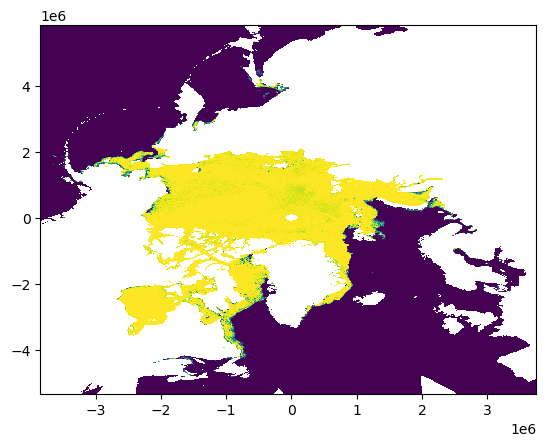

In [12]:
plt.pcolormesh(data['xx'], data['yy'], data['sic'])

array([[-3846875., -3840625., -3834375., ...,  3734375.,  3740625.,
         3746875.]])

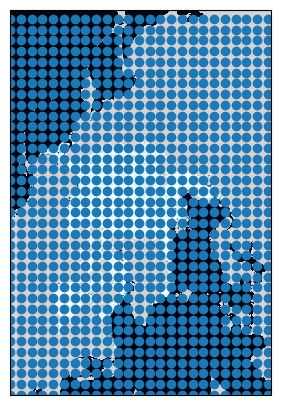

In [26]:
# create figure
#--------------
# create map figure in north polar stereographic projection
map_projection = data['proj'] #rotation of the map
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(projection=map_projection))

# background color
ax.patch.set_facecolor('lightgray')

# set map extent [lon1, lon2, lat1, lat2]
# ax.set_extent([200, 230, 68, 74], crs=ccrs.PlateCarree())  

# plot 2d sic data 
icec = ax.pcolormesh(data['xx'], data['yy'], data['sic'], 
                    cmap = cmocean.cm.ice, vmin=0, vmax=100, transform=data['proj'])

sp = 50
ax.scatter(data['xx'][::sp, ::sp], data['yy'][::sp, ::sp], transform=data['proj'])
#transform tells function original >> map_projection

data['xx'][0:1]

In [7]:
data['xx'].shape

(1792, 1216)

In [11]:
data['ds'].x.shape

(1216,)

## Make images into a GIF

In [ ]:
import imageio
images = []
for filename in :
    images.append(imageio.imread(save_path))
imageio.mimsave('/path/to/movie.gif', images)

## Plot the map with the slider

In [ ]:
# #plot the map
# plt.show()